In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from tqdm import tqdm
import scipy
from scipy.optimize import minimize
import pandas as pd

## Q1

The fit is acceptable at the 5% level of significance.


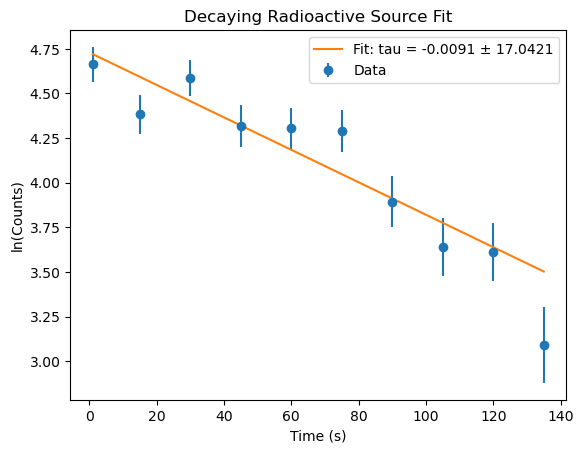

Lifetime: 110.0378 ± 17.0421 s


In [16]:
# Read data from file
data = pd.read_csv('endsemfit.txt', sep='\s+', header=None)
time = data.iloc[:, 0]
counts = data.iloc[:, 1]
uncertainties = data.iloc[:, 2]

# Calculate ln(N) and σ(ln(N))
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

# Define χ² function for linear regression
def chi_square(params, ln_counts, sigma_ln_counts, time):
    A, tau = params
    return np.sum(((ln_counts - A - tau * time) / sigma_ln_counts) ** 2)

# Initial guess for parameters
params_guess = [np.mean(ln_counts), 0]

# Minimize χ² function
result = minimize(chi_square, params_guess, args=(ln_counts, sigma_ln_counts, time))
A, tau = result.x

# Calculate lifetime
lifetime = -1 / tau
error = lifetime * np.sqrt(np.sum(sigma_ln_counts ** 2) / (len(time) - 2))

# Calculate reduced χ²
reduced_chi_square = (np.sum(((ln_counts - A - tau * time) / sigma_ln_counts) ** 2) / (len(time) - 2))

# Check if the fit is acceptable at the 5% level of significance
alpha = 0.05
df = len(time) - 2  # degrees of freedom
chi_square_critical = scipy.stats.chi2.ppf(1 - alpha, df)

if reduced_chi_square < chi_square_critical:
    print(f'The fit is acceptable at the 5% level of significance.')
else:
    print(f'The fit is NOT acceptable at the 5% level of significance.')

# Plot data and fit
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
plt.plot(time, A + tau * time, label=f'Fit: tau = {tau:.4f} ± {error:.4f}')
plt.xlabel('Time (s)')
plt.ylabel('ln(Counts)')
plt.title('Decaying Radioactive Source Fit')
plt.legend()
plt.show()

# Print results
print(f'Lifetime: {lifetime:.4f} ± {error:.4f} s')

## Q2

In [17]:
import numpy as np

# Constants
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422
T = 300

# Fixed point function for V
def f(V):
    return b + R*T/(p + a/(V**2))

# Initial guess for V
V = 1.0

# Tolerance for convergence
tol = 1e-5

# Maximum number of iterations
max_iter = 1000

# Iterate until convergence or maximum number of iterations is reached
for i in range(max_iter):
    V_new = f(V)
    diff = np.abs(V_new - V)
    if diff < tol:
        break
    V = V_new

# Print the result
print("V = {:.5f} L".format(V))
print("Number of iterations: {}".format(i+1))

V = 3.92995 L
Number of iterations: 9


## Q7

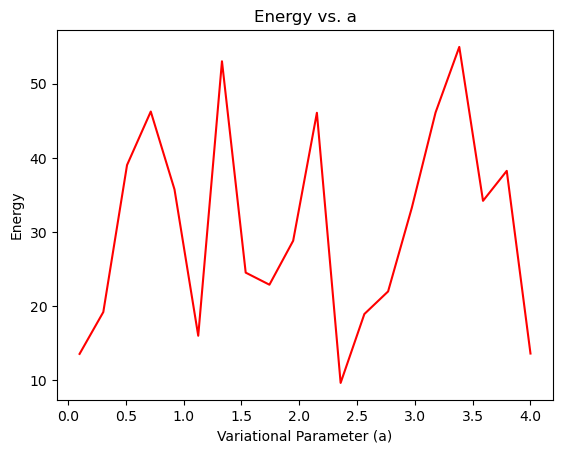

Lowest Energy: 9.645383931939929
Optimal Variational Parameter (a): 2.3578947368421055


In [18]:
def wavefunction(x, param):
    return 0.5 * (param*2 - x*2)

def energy(x):
    return 0.5 * x**2

def MonteCarlo(num_iterations, param):
    position = 0  
    energy_values = []

    for _ in range(num_iterations):
   
        new_position = np.random.normal(loc=position, scale=0.5)
        
        acceptance_probability = min(1, wavefunction(new_position, param) / wavefunction(position, param))

        if np.random.rand() < acceptance_probability:
            position = new_position
        
        # Compute local energy and add to list
        local_energy = energy(position) / wavefunction(position, param)
        energy_values.append(local_energy)

    return np.mean(energy_values)

# Simulation parameters
iterations = 20000
num_param_values = 20
param_values = np.linspace(0.1, 4, num_param_values)  

# Run Monte Carlo for each value of param
energy_estimates = []
for param in param_values:
    estimated_energy = MonteCarlo(iterations, param)
    energy_estimates.append(estimated_energy)

# Find the minimum energy and the corresponding optimal param value
lowest_energy = min(energy_estimates)
optimal_param = param_values[np.argmin(energy_estimates)]

# Plot the energy as a function of param
plt.plot(param_values, energy_estimates, color='r', linestyle='-')
plt.xlabel('Variational Parameter (a)')
plt.ylabel('Energy')
plt.title('Energy vs. a')
plt.show()

print("Lowest Energy:", lowest_energy)
print("Optimal Variational Parameter (a):", optimal_param)

## Q5

In [19]:
def power_method(A, num_simulations: int):
	n = A.shape[0]
	
	# Step 1: Initialize a random vector
	v = np.random.rand(n)
	
	# Step 2: Power method iterations
	for _ in range(num_simulations):
		# Multiply v by the matrix
		Av = np.dot(A, v)
		
		# Normalize Av
		v = Av / np.linalg.norm(Av)
		
	# Step 3: Calculate the eigenvalue
	eigenvalue = np.dot(v, np.dot(A, v)) / np.dot(v, v)
	eigenvector = v
	
	return eigenvalue, eigenvector


In [20]:
# Open the file in read mode
with open('endsemmat.txt', 'r') as f:
    # Read the lines into a list
    lines = f.readlines()

# Initialize an empty list to hold the matrix
matrix = []

# Loop over the lines
for line in lines:
    # Split the line into a list of strings
    row_str = line.split()
    # Convert the strings to integers and append to the matrix
    matrix.append([float(num_str) for num_str in row_str])

# Print the matrix
for row in matrix:
    print(row)

matrix = np.array(matrix)

[2.0, -1.0, 0.0, 0.0, 0.0]
[-1.0, 2.0, -1.0, 0.0, 0.0]
[0.0, -1.0, 2.0, -1.0, 0.0]
[0.0, 0.0, -1.0, 2.0, -1.0]
[0.0, 0.0, 0.0, -1.0, 2.0]


In [21]:
# Obtain the two largest eigenvalues and their corresponding eigenvectors
calculated_eigenvalues = []
calculated_eigenvectors = []
temp_matrix = matrix
for _ in range(2):
    eigenvalue, eigenvector = power_method(temp_matrix, 1000)
    calculated_eigenvalues.append(eigenvalue)
    calculated_eigenvectors.append(eigenvector)

    # Update the matrix by deflation
    temp_matrix = temp_matrix - eigenvalue * np.outer(eigenvector, eigenvector)

# Display the calculated eigenvalues and eigenvectors
print("Obtained Eigenvalues and Eigenvectors:\n")
for i in range(2):
    print(f"Eigenvalue {i+1}: {calculated_eigenvalues[i]}")
    print(f"Eigenvector {i+1}: {calculated_eigenvectors[i]}")
    print()

# Verify if they match λk = b + 2√ac cos(kπ/n + 1) and vi_k = 2(√c/a)^k sin(ikπ/n + 1)

# Constants
a = c = -1
b = 2
n = 5

# Compute expected eigenvalues and eigenvectors
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

# Normalize the expected eigenvectors
expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]

print("Comparison with theoretical values:\n")
# Display the expected and calculated eigenvalues and eigenvectors
for i in range(2):
    print(f"Theoretical eigenvalue {i+1}: {expected_eigenvalues[i]}")
    print(f"Calculated eigenvalue {i+1}: {calculated_eigenvalues[i]}")
    print()
    print(f"Theoretical eigenvector {i+1}: {expected_eigenvectors[i]}")
    print(f"Calculated eigenvector {i+1}: {calculated_eigenvectors[i]}")
    print()

Obtained Eigenvalues and Eigenvectors:

Eigenvalue 1: 3.732050807568877
Eigenvector 1: [ 0.28867513 -0.5         0.57735027 -0.5         0.28867513]

Eigenvalue 2: 2.9999999999999996
Eigenvector 2: [ 5.00000000e-01 -5.00000000e-01  1.96601994e-16  5.00000000e-01
 -5.00000000e-01]

Comparison with theoretical values:

Theoretical eigenvalue 1: 3.7320508075688776
Calculated eigenvalue 1: 3.732050807568877

Theoretical eigenvector 1: [0.28867513 0.5        0.57735027 0.5        0.28867513]
Calculated eigenvector 1: [ 0.28867513 -0.5         0.57735027 -0.5         0.28867513]

Theoretical eigenvalue 2: 3.0
Calculated eigenvalue 2: 2.9999999999999996

Theoretical eigenvector 2: [ 5.00000000e-01  5.00000000e-01  7.07050159e-17 -5.00000000e-01
 -5.00000000e-01]
Calculated eigenvector 2: [ 5.00000000e-01 -5.00000000e-01  1.96601994e-16  5.00000000e-01
 -5.00000000e-01]



## Q6

For the given distribution, the area under the curve from -a to a would be the integral of p(x) dx from -a to a, which is 2/3 * a^3. So, the success probability should be calculated as (2/3 * a^3) / (a * a^2) = 2/3.

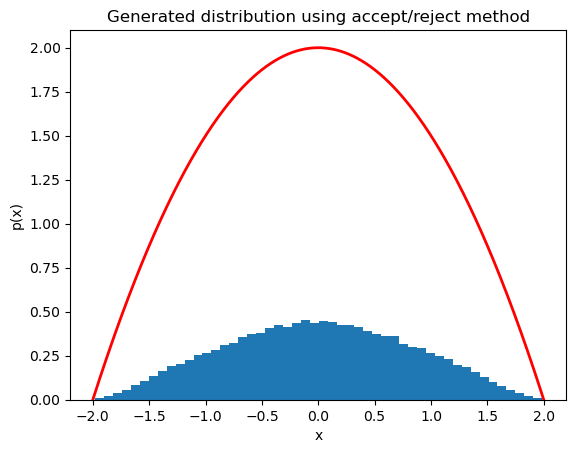

Success probability: 0.9112


In [22]:
import random
import matplotlib.pyplot as plt

def generate_gaussian_sample():
    u = random.uniform(0, 1)
    v = random.uniform(0, 1)
    return sqrt(-2 * log(u)) * cos(2 * pi * v)

def accept_reject_method(num_samples, a):
    accepted_samples = []
    for _ in range(num_samples):
        x = generate_gaussian_sample()
        if abs(x) < a and random.uniform(0, 1) < 0.5 * (a ** 2 - x ** 2):
            accepted_samples.append(x)
    return accepted_samples

def main():
    a = 2
    num_samples = 100000

    accepted_samples = accept_reject_method(num_samples, a)

    # Plot the generated distribution
    plt.hist(accepted_samples, bins=50, density=True)
    x = np.linspace(-a, a, 1000)
    y = 0.5 * (a ** 2 - x ** 2)
    plt.plot(x, y, 'r', linewidth=2)
    plt.title('Generated distribution using accept/reject method')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.show()

    # Calculate success probability
    success_probability = len(accepted_samples) / num_samples
    print(f'Success probability: {success_probability:.4f}')

if __name__ == '__main__':
    main()